# Preliminary operations

In [1]:
import os 

# SET HERE YOUR ROOTPATH
rootpath = 'C:\\Users\\chiar\\OneDrive\\Desktop\\XrAI'

# Set the working directory
os.chdir(rootpath) 

In [ ]:
#@title Main libraries
%pip install -r requirements.txt

import pandas as pd
import numpy as np

import os
import random

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

import tensorflow as tf
tfk = tf.keras
tfkl = tf.keras.layers

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from skimage import io

In [5]:
#@title Reproducibility
# Setting a seed for reproducibility
seed = 90 
random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)
print("The seed is: " + str(seed))

The seed is: 90


# Images exploration

In [6]:
#@title Image size
import imageio as iio
import random

dir = 'test_merged/all'
filelist = os.listdir(dir) 
random.shuffle(filelist)

for i, filename in enumerate(filelist):
  if i>20: break
  img = iio.imread(os.path.join(dir, filename))
  print(i, ": ", img.shape)

0 :  (400, 400)
1 :  (2234, 2234)
2 :  (1642, 1642)
3 :  (400, 400)
4 :  (400, 400)
5 :  (400, 400)
6 :  (400, 400)
7 :  (888, 888)
8 :  (400, 400)
9 :  (400, 400)
10 :  (400, 400)
11 :  (1682, 1682)
12 :  (400, 400)
13 :  (400, 400)
14 :  (400, 400)
15 :  (400, 400)
16 :  (400, 400)
17 :  (400, 400)
18 :  (400, 400)
19 :  (1964, 1964)
20 :  (400, 400)


C:\Users\chiar\AppData\Local\Temp\ipykernel_22624\1134143185.py:11: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = iio.imread(os.path.join(dir, filename))


In [11]:
#@title Access data
gen = ImageDataGenerator(rescale = 1/255.).flow_from_directory(directory = 'splitted_dataset/test',
                                              class_mode = 'categorical',
                                              batch_size = 128,
                                              shuffle = True)
gen.class_indices

Found 3095 images belonging to 3 classes.


{'normal': 0, 'pneumonia': 1, 'tubercolosis': 2}

In [12]:
#@title Visualize images 

def visualize_images(batch):
  # generator.next() provides [images, labels] (with dimension batch_size)

  images = batch[0]
  labels = np.argmax(batch[1], axis=-1)

  size,scale = 1000, 10
  c=5
    
  for i in range(3):
    f, axs = plt.subplots(1,c, figsize=(20,5))
    axs.flat
    xs = images[labels==i]
    for j in range(c):
      img = xs[j]
      axs[j].imshow(img)
      axs[j].set_title(list(gen.class_indices.items())[i][0])

In [13]:
nextbatch = gen.next()

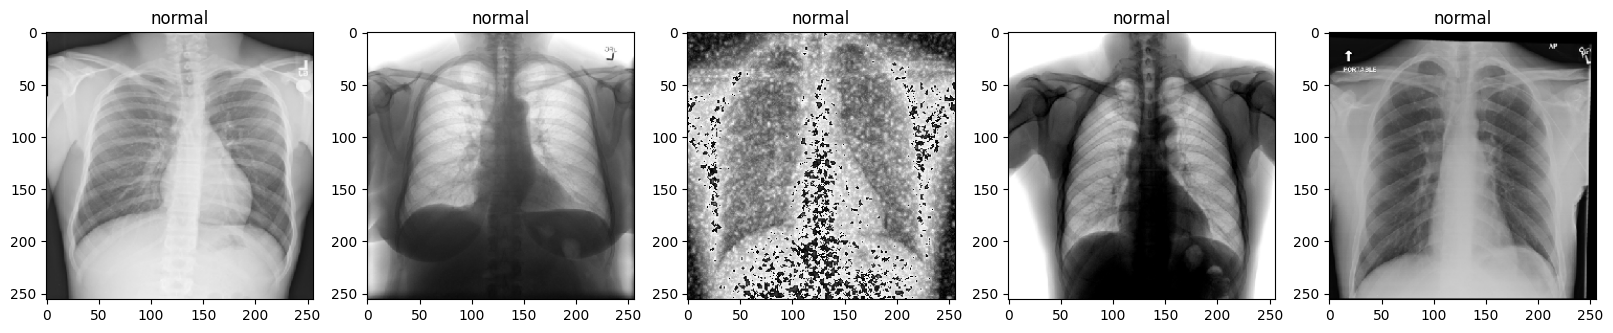

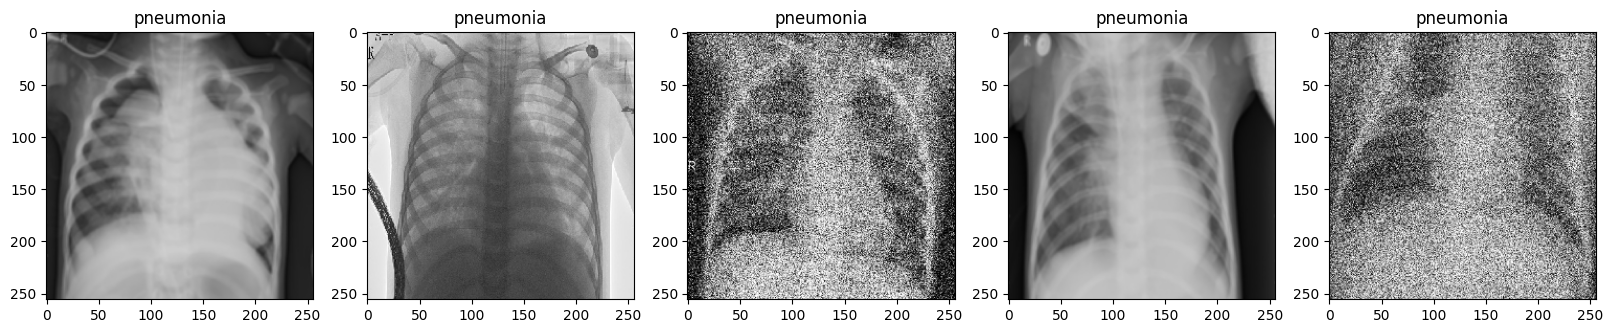

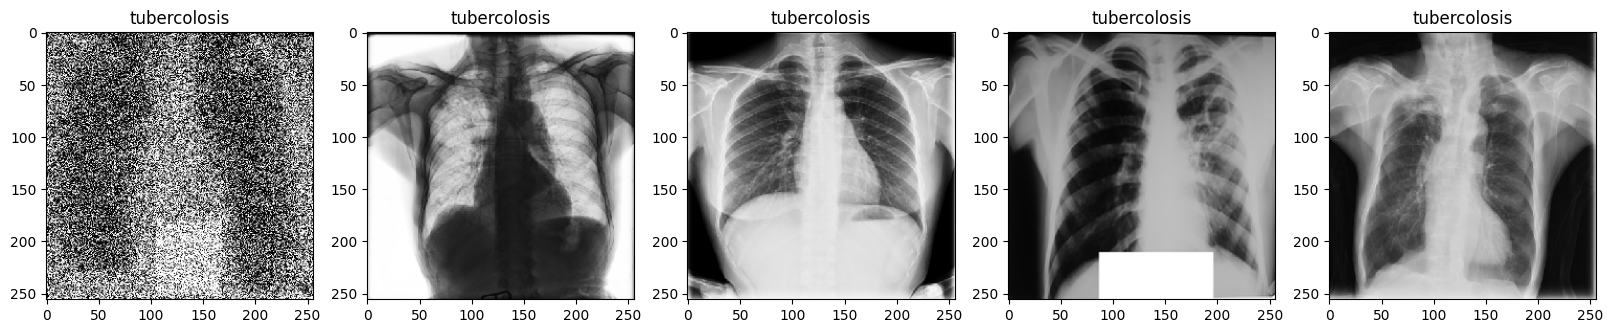

In [14]:
visualize_images(nextbatch)

# Target distribution 

In [16]:
dataset_dir = 'splitted_dataset'
training_dir = os.path.join(dataset_dir, 'train')
validation_dir = os.path.join(dataset_dir, 'val')
test_dir = os.path.join(dataset_dir, 'test')
training_set = ImageDataGenerator().flow_from_directory(directory = training_dir)
validation_set = ImageDataGenerator().flow_from_directory(directory = validation_dir)
test_set = ImageDataGenerator().flow_from_directory(directory = test_dir)

Found 11129 images belonging to 3 classes.
Found 1246 images belonging to 3 classes.
Found 3095 images belonging to 3 classes.


<Axes: >

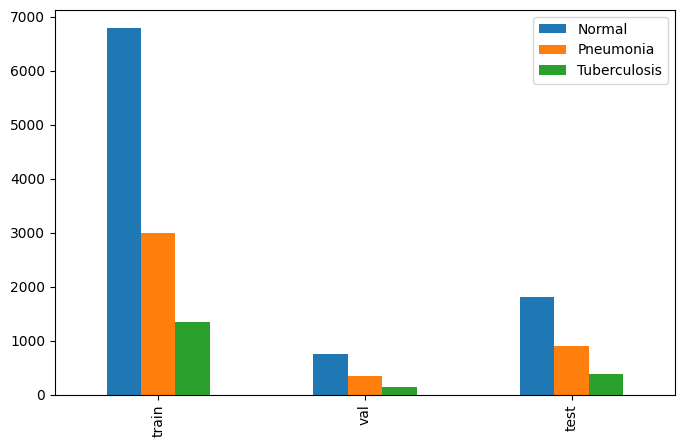

In [17]:
data= { "Normal":{
    'train': len(os.listdir('splitted_dataset/train/normal')),
    'val': len(os.listdir('splitted_dataset/val/normal')),
    'test': len(os.listdir('splitted_dataset/test/normal'))},
    "Pneumonia":{
    'train': len(os.listdir('splitted_dataset/train/pneumonia')),
    'val': len(os.listdir('splitted_dataset/val/pneumonia')),
    'test': len(os.listdir('splitted_dataset/test/pneumonia'))},
    "Tuberculosis":{
    'train': len(os.listdir('splitted_dataset/train/tubercolosis')),
    'val': len(os.listdir('splitted_dataset/val/tubercolosis')),
    'test': len(os.listdir('splitted_dataset/test/tubercolosis'))}}

data=pd.DataFrame(data)
data.plot(kind='bar', figsize=(8, 5))